In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from core.utils.image_analysis import *
from core.utils.basic_functions import *
from torchvision.transforms import ToTensor, ToPILImage, Pad, Compose
from torchvision.utils import make_grid
from core.utils.CNN_scorers import resize_and_pad_tsr


In [2]:
# set path variabels
pd_key="expriment_meta_data_df"
proc_data_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\unit_inflation_smal_set"
rawdata_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\unit_inflation_smal_set\unit_inflation_small_set_081723"
save_root = os.path.join(r"N:\PonceLab\Users\Alireza\insilico_experiments\proto_img_sim_vs_activity")
os.makedirs(save_root, exist_ok=True)
concated_df_path = os.path.join(proc_data_root, "metadata_dfs_preprocessed_concated")
metadata_df_cosine = pd.read_hdf(os.path.join(concated_df_path, "meta_data_df.h5"), key=pd_key)
metadata_df_cosine.loc[metadata_df_cosine['modif_unit_id'].isnull(), 'exp_stage'] = 'reconstruction'

In [3]:
# let load proto image
'''
layer_short= "conv5"
similarity_metric_list = ["MSE", "cosine"]
smpling_types = ["most", 'random']
pop_size = 128
gen_rerun_id_max = metadata_df_cosine["gen_rerun_id"].max()
pop_resampling_max = metadata_df_cosine["pop_resampling_id"].max()
image_name_list = metadata_df_cosine[(metadata_df_cosine["layer_short"] == layer_short)&\
                                      (metadata_df_cosine["pop_size"] == pop_size)]["trget_imge_name"].unique()


pro_image_type = "best_gen_imgs"
pop_act_evol_type = "popul_act_evol"
inflation_tragectory_type = "best_in_each_gen_imgs_RF_masked"

inflation_evol_data_type = "generation_data"

# set foint size
plt.rcParams.update({'font.size': 21})

# Load or create your matrix
metric_list = ['euclidean', 'cosine']  # Example metric in ['euclidean', 'correlation', 'cosine']


RF_treshold = 2
pop_resampling_id = 0
num_of_sample_to_print = 16
save_path_root = os.path.join(save_root, f"inflation_profile_{pop_size}_v3")

# load rsetive filed mask
rf_obj = np.load(os.path.join(proc_data_root, "rf_filters", f"{layer_short}_{pop_size}.npz"))

# setup the  GAN
gan_name = 'fc6'
Ngens = 100
num_gen = 100
##
sampling_type = smpling_types[0]
similarity_metric = 'MSE'
image_name = image_name_list[1]
gen_rerun_id = 0
##

proto_list = list()
proto_score_list = list()
proto_unit_idx = list()
proto_gen_rerun_id = list()
proto_unit_real_id = list()
proto_image_idx_list = list()
proto_sampling_type_idx_list = list()
proto_image_namme_list = list()
proto_sampling_type_list = list()

proto_gen_idx = list()
units_proto_evol_codes = list()
units_proto_evol_score = np.zeros((pop_size, num_gen))
units_proto_evol_act_mat_list = list()
units_proto_evol_unit_idx = list()
units_proto_evol_gen_id = list()
units_proto_evol_gen_rerun_id = list()

sampling_type = smpling_types[1]
si = 1
image_name = image_name_list[0]
ii = 0
gen_rerun_id = 0

for ni in range(pop_size):
    ''''''inflation_evol_data = load_npz(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
            output_type=inflation_evol_data_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
            similarity_metric=similarity_metric, sub_pop_type=sampling_type,
            pop_resampling_id=pop_resampling_id, exp_stage = 'inflation_from_scratch', modif_unit_idx=ni)
    actmat_all = inflation_evol_data['actmat_all']
    generations = inflation_evol_data['generations']
    scores_all = inflation_evol_data['scores_all']
    best_code_all = inflation_evol_data['best_codes']
    units_proto_evol_codes.append(best_code_all)
    units_proto_evol_unit_idx.append(np.ones(num_gen) * ni)
    units_proto_evol_gen_id.append(np.arange(num_gen))
    units_proto_evol_gen_rerun_id.append(np.ones(num_gen) * gen_rerun_id)
    units_proto_evol_act_mat = np.zeros((num_gen, pop_size))
    for gi in range(num_gen):
        scores_gen = scores_all[generations == gi]
        actmat_gen = actmat_all[generations == gi, :]
        max_score_index = scores_gen.argmax()
        units_proto_evol_score_o[ni, gi] = scores_gen[max_score_index]
        units_proto_evol_act_mat[gi, :] = actmat_gen[max_score_index, :]
    units_proto_evol_act_mat_list.append(units_proto_evol_act_mat)   
    # get cell prototypes'''''''
    unit_prtoptype = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                                    output_type=pro_image_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                                    similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                                    pop_resampling_id=pop_resampling_id, exp_stage = 'inflation_from_scratch', modif_unit_idx=ni)
    proto_score = column_inquary('score', metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                                    output_type=pro_image_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                                    similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                                    pop_resampling_id=pop_resampling_id, exp_stage = 'inflation_from_scratch', modif_unit_idx=ni)
    unit_real_id = column_inquary('modif_unit_id', metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                                    output_type=pro_image_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                                    similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                                    pop_resampling_id=pop_resampling_id, exp_stage = 'inflation_from_scratch', modif_unit_idx=ni)
    proto_score_list.append(proto_score)
    proto_list.append(unit_prtoptype)
    proto_unit_idx.append(ni)
    proto_gen_rerun_id.append(gen_rerun_id)
    proto_unit_real_id.append(unit_real_id[1])
    proto_image_namme_list.append(image_name)
    proto_sampling_type_list.append(sampling_type)
    proto_sampling_type_idx_list.append(si)
    proto_image_idx_list.append(ii)
# let save all the list ve generated
save_path = os.path.join(save_root, "NPZ")
os.makedirs(save_path, exist_ok=True)
np.savez(os.path.join(save_path,"pre_pros_list_short.npz"), proto_list=proto_list, proto_score_list=proto_score_list, proto_unit_idx=proto_unit_idx,
        proto_gen_rerun_id=proto_gen_rerun_id, proto_unit_real_id=proto_unit_real_id, proto_image_namme_list=proto_image_namme_list,
        proto_sampling_type_list=proto_sampling_type_list, proto_sampling_type_idx_list=proto_sampling_type_idx_list, proto_image_idx_list=proto_image_idx_list)
'''
    

'\nlayer_short= "conv5"\nsimilarity_metric_list = ["MSE", "cosine"]\nsmpling_types = ["most", \'random\']\npop_size = 128\ngen_rerun_id_max = metadata_df_cosine["gen_rerun_id"].max()\npop_resampling_max = metadata_df_cosine["pop_resampling_id"].max()\nimage_name_list = metadata_df_cosine[(metadata_df_cosine["layer_short"] == layer_short)&                                      (metadata_df_cosine["pop_size"] == pop_size)]["trget_imge_name"].unique()\n\n\npro_image_type = "best_gen_imgs"\npop_act_evol_type = "popul_act_evol"\ninflation_tragectory_type = "best_in_each_gen_imgs_RF_masked"\n\ninflation_evol_data_type = "generation_data"\n\n# set foint size\nplt.rcParams.update({\'font.size\': 21})\n\n# Load or create your matrix\nmetric_list = [\'euclidean\', \'cosine\']  # Example metric in [\'euclidean\', \'correlation\', \'cosine\']\n\n\nRF_treshold = 2\npop_resampling_id = 0\nnum_of_sample_to_print = 16\nsave_path_root = os.path.join(save_root, f"inflation_profile_{pop_size}_v3")\n\n# lo

In [4]:
# let load the data
save_path = os.path.join(save_root, "NPZ")
# load the data
proto_data = np.load(os.path.join(save_path,"pre_pros_list_short.npz"), allow_pickle=True)
proto_list = proto_data['proto_list']
proto_list = [x for x in proto_list]
proto_score_list = proto_data['proto_score_list']
proto_score_list = [x for x in proto_score_list]
proto_unit_idx = proto_data['proto_unit_idx']
proto_unit_idx = [x for x in proto_unit_idx]
proto_gen_rerun_id = proto_data['proto_gen_rerun_id']
proto_gen_rerun_id = [x for x in proto_gen_rerun_id]
proto_unit_real_id = proto_data['proto_unit_real_id']
proto_unit_real_id = [x for x in proto_unit_real_id]
proto_image_namme_list = proto_data['proto_image_namme_list']
proto_image_namme_list = [x for x in proto_image_namme_list]
proto_sampling_type_list = proto_data['proto_sampling_type_list']
proto_sampling_type_list = [x for x in proto_sampling_type_list]
proto_sampling_type_idx_list = proto_data['proto_sampling_type_idx_list']
proto_sampling_type_idx_list = [x for x in proto_sampling_type_idx_list]
proto_image_idx_list = proto_data['proto_image_idx_list']
proto_image_idx_list = [x for x in proto_image_idx_list]



In [5]:
# let get the recon image and infor
similarity_metric_list = ["MSE", "cosine"]
smpling_types = ["most", 'random']
pop_size = 128
similarity_metric = 'MSE'
gen_rerun_id = 0
pop_resampling_id = 0
gan_name = 'fc6'
Ngens = 100
num_gen = 100
pop_act_evol_type = "popul_act_evol"
layer_short= "conv5"
inflation_evol_data_type = "generation_data"
target_type = "target_img"
gen_image_type = "best_gen_imgs"
image_name_list = metadata_df_cosine[(metadata_df_cosine["layer_short"] == layer_short)&\
                                      (metadata_df_cosine["pop_size"] == pop_size)]["trget_imge_name"].unique()
sampling_type = smpling_types[1]
image_name = image_name_list[0]
ii = 0
si = 1

recon_list = list()
target_list = list()
reccon_act_map_list = list()
recon_act_mat_last_gen_list = list()    
recon_pop_ids_list= list()
recon_gen_rerun_id = list()
recon_unit_real_id = list()
recon_image_idx_list = list()
recon_sampling_type_idx_list = list()
recon_image_namme_list = list()
recon_sampling_type_list = list()

                        
target_image = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
            output_type=target_type, pop_size=pop_size,
            similarity_metric=similarity_metric, sub_pop_type=sampling_type,
            pop_resampling_id=pop_resampling_id, exp_stage = 'reconstruction')

recontruction_image = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                        output_type=gen_image_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                        similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                        pop_resampling_id=pop_resampling_id, exp_stage = 'reconstruction')

pop_act_evol = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                        output_type=pop_act_evol_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                        similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                        pop_resampling_id=pop_resampling_id, exp_stage = 'reconstruction')
selected_pop = column_inquary('pop_unit_idx', metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                        output_type=pop_act_evol_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                        similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                        pop_resampling_id=pop_resampling_id, exp_stage = 'reconstruction')
inflation_evol_data = load_npz(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                        output_type=inflation_evol_data_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                        similarity_metric=similarity_metric, sub_pop_type=sampling_type,
                        pop_resampling_id=pop_resampling_id, exp_stage = 'reconstruction')    
recon_best_code_all = inflation_evol_data['best_codes']
recon_generations = inflation_evol_data['generations']
recon_scores_all = inflation_evol_data['scores_all']
recon_actmat_all = inflation_evol_data['actmat_all']
recon_act_mat = np.zeros((num_gen, pop_size))
for gi in range(num_gen):
    scores_gen = recon_scores_all[recon_generations == gi]
    actmat_gen = recon_actmat_all[recon_generations == gi, :]
    max_score_index = scores_gen.argmax()
    recon_act_mat[gi, :] = actmat_gen[max_score_index, :]

scores_gen = recon_scores_all[recon_generations == num_gen-1]
actmat_gen = recon_actmat_all[recon_generations == num_gen-1, :]
max_score_index = scores_gen.argmax()
last_gen_act_map = actmat_gen[max_score_index, :]

reccon_act_map_list.append(recon_act_mat)
recon_list.append(recontruction_image)
target_list.append(target_image)
recon_pop_ids_list.append(selected_pop)
recon_gen_rerun_id.append(gen_rerun_id)
recon_unit_real_id.append(selected_pop)
recon_image_idx_list.append(ii)
recon_sampling_type_idx_list.append(si)
recon_image_namme_list.append(image_name)
recon_sampling_type_list.append(sampling_type)
recon_act_mat_last_gen_list.append(last_gen_act_map)


In [6]:
rf_obj = np.load(os.path.join(proc_data_root, "rf_filters", f"{layer_short}_{pop_size}.npz"))
# make (N, 3, 224, 224) tensor of the prototypes using the proto_list
def apply_rf_mask(RF_filter, img):
        if len(img.shape) == 3:
                masked_img =\
                        (torch.from_numpy(np.absolute(RF_filter[None,:,:])) / RF_filter.max()) *\
                        img
        elif len(img.shape) == 4:
                masked_img =\
                (torch.from_numpy(np.absolute(RF_filter[None,None,:,:])) / RF_filter.max()) *\
        img
        else:
                raise ValueError("The shape of the input image is not correct")
        return masked_img
    
        
# let covert the proto_list from numpy.ndarray to tuple of torch.tensor
RF_filter = rf_obj["fitmap"]
proto_tensor = torch.stack(proto_list)
proto_tensor_masked = apply_rf_mask(RF_filter, proto_tensor)
proto_list_mask = [apply_rf_mask(RF_filter, img) for img in proto_list]
recon_list_masked = [apply_rf_mask(RF_filter, img) for img in recon_list]
target_list_masked = [apply_rf_mask(RF_filter, img) for img in target_list]


In [7]:
from core.utils.image_similarity import TorchImageDistance
img_sim_obj = TorchImageDistance()

In [8]:
recon_proto_similarities = list()
target_proto_similarities = list()
recon_proto_similarities_mat = list()
target_proto_similarities_mat = list()
unit_act = list()
recon_proto_similarities_gen_reeun = list()
target_proto_similarities_gen_rerun = list()
unit_act_gen_rerun = list()




recon_idx = np.where((np.array(recon_image_namme_list) == image_name) &\
                    (np.array(recon_sampling_type_list) == sampling_type) &\
                    (np.array(recon_gen_rerun_id) == gen_rerun_id))[0][0]
selected_pop = recon_pop_ids_list[recon_idx]
selected_pop = selected_pop['.features.Conv2d10']
slected_act_mat = recon_act_mat_last_gen_list[recon_idx]
this_recon_proto = list()
this_recon_act_mat = list()
for ruidx, rui in enumerate(selected_pop):
    unit_selected_proto_idx = np.where(np.array(proto_unit_real_id)==rui)[0]
    this_unit_proto = [proto_list_mask[pri] for pri in unit_selected_proto_idx] # you can do eather masked or unmasked
    this_recon_act_mat.extend(np.repeat(slected_act_mat[ruidx], len(this_unit_proto), axis=0))
    this_recon_proto.extend(this_unit_proto)
this_recon_proto_tensor = torch.stack(this_recon_proto).float()
this_recon_recon_imge = recon_list_masked[recon_idx].float()
this_recon_target_imge = target_list_masked[recon_idx].float()
# repeat the target and recon image to the number of the proto image in batch dim
this_recon_recon_imge = this_recon_recon_imge.repeat(len(this_recon_proto), 1, 1, 1)
this_recon_target_imge = this_recon_target_imge.repeat(len(this_recon_proto), 1, 1, 1)

img_sim_obj.set_first_image_batch(this_recon_proto_tensor)
img_sim_obj.set_second_image_batch(this_recon_recon_imge)
recon_proto_similarities_CNN_idx = img_sim_obj.get_LPIPS_distance()
#encoded_first_image_batch_list, encoded_second_image_batch_list = img_sim_obj.get_CCN_similarity()
img_sim_obj.set_second_image_batch(this_recon_target_imge)
target_proto_similarities_CNN_idx = img_sim_obj.get_LPIPS_distance()

recon_proto_similarities = -recon_proto_similarities_CNN_idx
target_proto_similarities = -target_proto_similarities_CNN_idx
unit_act = this_recon_act_mat



Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth


In [9]:
'''from core.utils.image_similarity import TorchImageSimilarity
recon_proto_similarities = list()
target_proto_similarities = list()
recon_proto_similarities_mat = list()
target_proto_similarities_mat = list()
unit_act = list()
recon_proto_similarities_gen_reeun = list()
target_proto_similarities_gen_rerun = list()
unit_act_gen_rerun = list()

from core.utils.CNN_scorers import TorchScorer
from inSilico_experiments.utils.func_lib import *
from sklearn.metrics.pairwise import cosine_similarity

input_size = (3, 227, 227)
net_name = 'cornet_s'
layer_list = ['.V1.BatchNorm2dnorm2', '.V2.BatchNorm2dnorm3_1', '.V4.BatchNorm2dnorm3_3', '.IT.BatchNorm2dnorm3_1']
scorer = TorchScorer(net_name)
module_names, module_types, module_spec = get_module_names(
    scorer.model, input_size, "cuda", False)
unit_mask_dict, unit_tsridx_dict = set_all_center_unit_population_recording(
                    scorer, layer_list)


recon_idx = np.where((np.array(recon_image_namme_list) == image_name) &\
                    (np.array(recon_sampling_type_list) == sampling_type) &\
                    (np.array(recon_gen_rerun_id) == gen_rerun_id))[0][0]
selected_pop = recon_pop_ids_list[recon_idx]
selected_pop = selected_pop['.features.Conv2d10']
slected_act_mat = recon_act_mat_last_gen_list[recon_idx]
this_recon_proto = list()
this_recon_act_mat = list()
for ruidx, rui in enumerate(selected_pop):
    unit_selected_proto_idx = np.where(np.array(proto_unit_real_id)==rui)[0]
    this_unit_proto = [proto_list_mask[pri] for pri in unit_selected_proto_idx] # you can do eather masked or unmasked
    this_recon_act_mat.extend(np.repeat(slected_act_mat[ruidx], len(this_unit_proto), axis=0))
    this_recon_proto.extend(this_unit_proto)
this_recon_proto_tensor = torch.stack(this_recon_proto).float()
this_recon_recon_imge = recon_list_masked[recon_idx].float()
this_recon_target_imge = target_list_masked[recon_idx].float()
# repeat the target and recon image to the number of the proto image in batch dim
this_recon_recon_imge = this_recon_recon_imge.repeat(len(this_recon_proto), 1, 1, 1)
this_recon_target_imge = this_recon_target_imge.repeat(len(this_recon_proto), 1, 1, 1)

proto_encoded, _ = encode_image(scorer, this_recon_proto_tensor,  key=layer_list,
                                    RFresize=False, cat_layes=False)
recon_encoded, _ = encode_image(scorer, this_recon_recon_imge,  key=layer_list,
                                    RFresize=False, cat_layes=False)
target_encoded, _ = encode_image(scorer, this_recon_target_imge,  key=layer_list,
                                    RFresize=False, cat_layes=False)
unit_act = this_recon_act_mat

scorer.cleanup()'''


'from core.utils.image_similarity import TorchImageSimilarity\nrecon_proto_similarities = list()\ntarget_proto_similarities = list()\nrecon_proto_similarities_mat = list()\ntarget_proto_similarities_mat = list()\nunit_act = list()\nrecon_proto_similarities_gen_reeun = list()\ntarget_proto_similarities_gen_rerun = list()\nunit_act_gen_rerun = list()\n\nfrom core.utils.CNN_scorers import TorchScorer\nfrom inSilico_experiments.utils.func_lib import *\nfrom sklearn.metrics.pairwise import cosine_similarity\n\ninput_size = (3, 227, 227)\nnet_name = \'cornet_s\'\nlayer_list = [\'.V1.BatchNorm2dnorm2\', \'.V2.BatchNorm2dnorm3_1\', \'.V4.BatchNorm2dnorm3_3\', \'.IT.BatchNorm2dnorm3_1\']\nscorer = TorchScorer(net_name)\nmodule_names, module_types, module_spec = get_module_names(\n    scorer.model, input_size, "cuda", False)\nunit_mask_dict, unit_tsridx_dict = set_all_center_unit_population_recording(\n                    scorer, layer_list)\n\n\nrecon_idx = np.where((np.array(recon_image_namme_

In [10]:
'''li = 0
recon_proto_similarities = -np.mean(recon_proto_similarities_CNN_mat, axis=0)[li]
target_proto_similarities = -np.mean(target_proto_similarities_CNN_mat, axis=0)[li]
unit_act = this_recon_act_mat'''

'li = 0\nrecon_proto_similarities = -np.mean(recon_proto_similarities_CNN_mat, axis=0)[li]\ntarget_proto_similarities = -np.mean(target_proto_similarities_CNN_mat, axis=0)[li]\nunit_act = this_recon_act_mat'

In [11]:
target_proto_similarities.squeeze()

tensor([-0.2201, -0.2581, -0.2182, -0.2736, -0.2577, -0.2309, -0.2682, -0.2599,
        -0.2577, -0.2424, -0.2440, -0.2449, -0.2529, -0.2553, -0.2593, -0.2537,
        -0.2600, -0.2712, -0.2227, -0.2115, -0.2356, -0.2672, -0.2362, -0.2547,
        -0.2579, -0.2435, -0.2609, -0.2539, -0.2794, -0.2526, -0.2422, -0.2538,
        -0.2378, -0.2685, -0.2323, -0.2579, -0.2407, -0.2311, -0.2482, -0.2406,
        -0.2492, -0.2366, -0.2346, -0.2315, -0.2386, -0.2666, -0.2377, -0.2681,
        -0.2539, -0.2266, -0.2016, -0.2438, -0.2720, -0.2150, -0.2427, -0.2587,
        -0.2574, -0.2142, -0.2613, -0.2725, -0.2638, -0.2320, -0.2502, -0.2359,
        -0.2395, -0.2343, -0.2521, -0.2351, -0.2584, -0.2551, -0.2354, -0.2687,
        -0.2630, -0.2649, -0.2663, -0.2548, -0.2572, -0.2592, -0.2407, -0.2119,
        -0.2926, -0.2505, -0.2687, -0.2550, -0.2347, -0.2276, -0.2518, -0.2457,
        -0.2597, -0.2709, -0.2231, -0.2332, -0.2276, -0.2421, -0.2794, -0.2348,
        -0.2372, -0.2522, -0.2596, -0.25

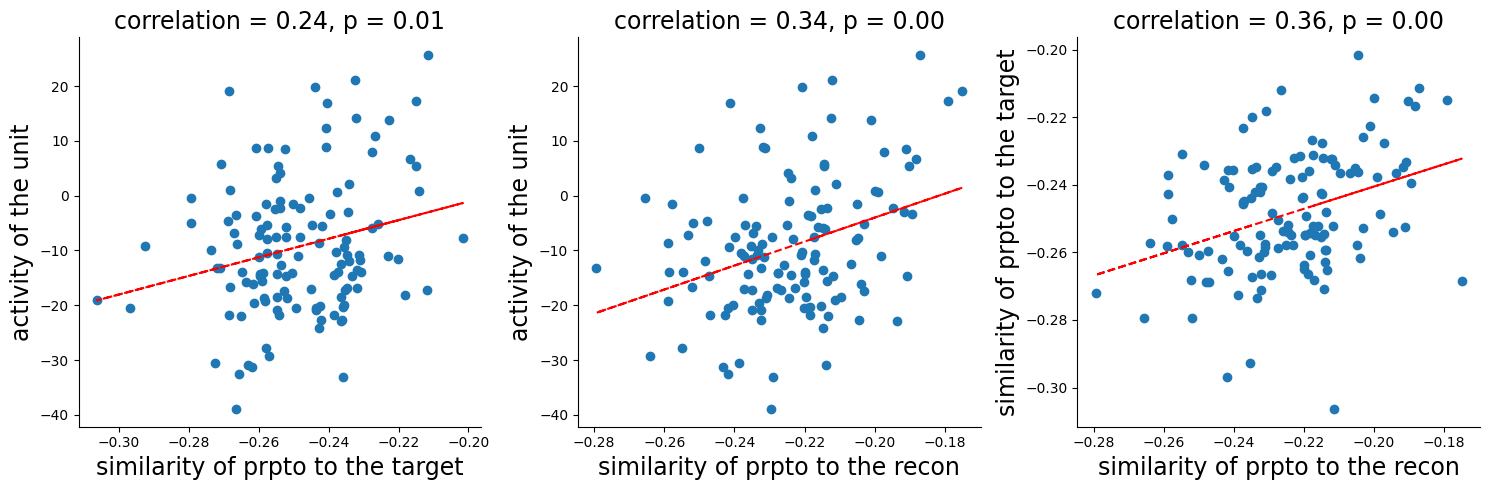

In [12]:
# let have scatter plot of the similarity of the prototypes to the target image and the activity of the units
# for both the target and the reconstruction
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(target_proto_similarities, unit_act)
ax[0].set_xlabel("similarity of prpto to the target", fontsize=17)
ax[0].set_ylabel("activity of the unit", fontsize=17)
# let add linear regression line 
z = np.polyfit(target_proto_similarities, unit_act, 1)
p = np.poly1d(z)
ax[0].plot(target_proto_similarities,p(target_proto_similarities),"r--")
# add correlation and p value to the title
correlation, p_value = stats.pearsonr(target_proto_similarities, unit_act)
ax[0].set_title(f"correlation = {correlation:.2f}, p = {p_value:.2f}", fontsize=17)

ax[1].scatter(recon_proto_similarities, unit_act)
ax[1].set_xlabel("similarity of prpto to the recon", fontsize=17)
ax[1].set_ylabel("activity of the unit", fontsize=17)
# let add linear regression line
z = np.polyfit(recon_proto_similarities, unit_act, 1)
p = np.poly1d(z)
ax[1].plot(recon_proto_similarities,p(recon_proto_similarities),"r--")
# add correlation and p value to the title
correlation, p_value = stats.pearsonr(recon_proto_similarities, unit_act)
ax[1].set_title(f"correlation = {correlation:.2f}, p = {p_value:.2f}", fontsize=17)

ax[2].scatter(recon_proto_similarities, target_proto_similarities)
ax[2].set_xlabel("similarity of prpto to the recon", fontsize=17)
ax[2].set_ylabel("similarity of prpto to the target", fontsize=17)
# let add linear regression line
z = np.polyfit(recon_proto_similarities, target_proto_similarities, 1)
p = np.poly1d(z)
ax[2].plot(recon_proto_similarities,p(recon_proto_similarities),"r--")
# add correlation and p value to the title
correlation, p_value = stats.pearsonr(recon_proto_similarities, target_proto_similarities)
ax[2].set_title(f"correlation = {correlation:.2f}, p = {p_value:.2f}", fontsize=17)
plt.tight_layout()
plt.show()

In [13]:
np.ones((1,2), dtype=np.bool)  

C:\Users\Alireza\AppData\Local\Temp\ipykernel_15892\4204387920.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones((1,2), dtype=np.bool)


array([[ True,  True]])